# Capstone project - HealthCare Fraud Detection : Support Vector Machine Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,\
StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve,roc_auc_score,f1_score
from sklearn.feature_selection import RFE
from yellowbrick.classifier import confusion_matrix, classification_report, ROCAUC
from yellowbrick.model_selection import CVScores
from cp_clean_helper import show_values
from LGR_helper import std_num_cols, rb_scale_cols, model_results, get_confusion_matrix
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### # Loading datasets, and looking at shapes:-

In [2]:
# Loading train-test 70:30 split (SMOTE and BorderlineSMOTE) datasets
# For these same columns have been drooped as done for the LGR model

trainX_SM = pd.read_csv("trainX_SM.csv",index_col=0)
trainY_SM = pd.read_csv("trainY_SM.csv",index_col=0)
testX_SM = pd.read_csv("testX_SM.csv",index_col=0)
testY_SM = pd.read_csv("testY_SM.csv",index_col=0)

trainX_BSM = pd.read_csv("trainX_BSM.csv",index_col=0)
trainY_BSM = pd.read_csv("trainY_BSM.csv",index_col=0)
testX_BSM = pd.read_csv("testX_BSM.csv",index_col=0)
testY_BSM = pd.read_csv("testY_BSM.csv",index_col=0)

# Looking at dataset shapes

print('\n')
print('Shape of SMOTE balanced trainX data :',trainX_SM.shape)
print('Shape of SMOTE balanced trainY data :',trainY_SM.shape)
print('Shape of SMOTE balanced testX data :',testX_SM.shape)
print('Shape of SMOTE balanced testY data :',testY_SM.shape)
print('Shape of Borderline SMOTE balanced trainX data :',trainX_BSM.shape)
print('Shape of Borderline SMOTE balanced trainY data :',trainY_BSM.shape)
print('Shape of Borderline SMOTE balanced testX data :',testX_BSM.shape)
print('Shape of Borderline SMOTE balanced testY data :',testY_BSM.shape, end='\n')
print('\n')
print("*"*60)

# Looking at class ratios

print('\n')
print('Class ratio - Fraud/Non-Fraud (trainY_SM) :',trainY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_SM) :',testY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (trainY_BSM) :',trainY_BSM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_BSM) :',testY_BSM.value_counts(normalize=True)*100, end='\n')
print('\n')
print("*"*60)



Shape of SMOTE balanced trainX data : (483580, 44)
Shape of SMOTE balanced trainY data : (483580, 1)
Shape of SMOTE balanced testX data : (207250, 44)
Shape of SMOTE balanced testY data : (207250, 1)
Shape of Borderline SMOTE balanced trainX data : (483580, 44)
Shape of Borderline SMOTE balanced trainY data : (483580, 1)
Shape of Borderline SMOTE balanced testX data : (207250, 44)
Shape of Borderline SMOTE balanced testY data : (207250, 1)


************************************************************


Class ratio - Fraud/Non-Fraud (trainY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (trainY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64


*******

### # Standardizing the train/test features for balanced datasets:

In [3]:
# SMOTE balanced dataset

# std_num_cols(trainX_SM)
# std_num_cols(testX_SM)

# BorderlineSMOTE balanced dataset

# std_num_cols(trainX_BSM)
# std_num_cols(testX_BSM)

### Baseline ADABoost Classifier Model - Standardized:

In [4]:
# SMOTE Balanced

# ada_std = AdaBoostClassifier(random_state=0)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, ada_std, show = True)

In [5]:
# BorderlineSMOTE Balanced

# ada_std = AdaBoostClassifier(random_state=0)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, ada_std, show = True)

### # Robust Scaling the train/test features for  balanced datasets:

In [6]:
# SMOTE balanced dataset

rb_scale_cols(trainX_SM)
rb_scale_cols(testX_SM)

# BorderlineSMOTE balanced dataset

rb_scale_cols(trainX_BSM)
rb_scale_cols(testX_BSM)

### Baseline Linear Support Vector Classifier Model - Robust Scaled

In [7]:
# SMOTE Balanced

# ada_sm = AdaBoostClassifier(random_state=0)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, ada_sm, show = True)

In [8]:
# BorderlineSMOTE Balanced

# ada_bsm = AdaBoostClassifier(random_state=0)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, ada_bsm, show = True)

## Using Grid Search to select best parameters for SM dataset:

- SM Dataset

In [9]:
# Setting x and y variables

# tr_x = trainX_SM
# tr_y = trainY_SM
# ts_x = testX_SM
# ts_y = testY_SM

# Setting model required parameters
# ada_sm = AdaBoostClassifier(random_state=0)

# Setting the parameter grid
# grid_para_ada = [{
#     "n_estimators": [80,100,115,125,150],
#     "learning_rate": np.linspace(start=0.1, stop=2, num=10, dtype=float)}]

# Running the RF model through the grid search
# grid_search_ada = RandomizedSearchCV(ada_sm, grid_para_ada,\
#                                      cv=5,scoring='f1_weighted',verbose=1,\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_ada.fit(tr_x, tr_y)

In [10]:
# The best parameters

# grid_search_ada.best_params_

In [11]:
# The best score

# grid_search_ada.best_score_

In [12]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_ada.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_ada.best_estimator_.score(ts_x, ts_y)))

- BSM Dataset

In [13]:
# Setting x and y variables

# tr_x = trainX_BSM
# tr_y = trainY_BSM
# ts_x = testX_BSM
# ts_y = testY_BSM

# Setting model required parameters
# ada_bsm = AdaBoostClassifier(random_state=0)

# Setting the parameter grid
# grid_para_ada = [{
#     "n_estimators": [80,100,115,125,150],
#     "learning_rate": np.linspace(start=0.1, stop=2, num=10, dtype=float)}]

# Running the RF model through the grid search
# grid_search_ada = RandomizedSearchCV(ada_bsm, grid_para_ada,\
#                                      cv=5,scoring='f1_weighted',verbose=1,\
#                                      return_train_score = True, n_jobs=-1)

# grid_search_ada.fit(tr_x, tr_y)

In [14]:
# The best parameters

# grid_search_ada.best_params_

In [15]:
# The best score

# grid_search_ada.best_score_

In [16]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_ada.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_ada.best_estimator_.score(ts_x, ts_y)))

### # Working towards the final models

In [17]:
# Selecting the best model from the Grid Search as the final SM model with some changes

# ada_sm = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=1.36)

# Model with all features and BSM:

# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, ada_sm, show=True)

In [18]:
# Selecting the best model from the Grid Search as the final BSM model with some changes

# ada_bsm = AdaBoostClassifier(random_state=42, n_estimators=150,learning_rate=1.78)

# Model with all features and BSM:

# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, ada_bsm, show=True)

### # With RF model as base estimator:

In [19]:
# from sklearn.ensemble import RandomForestClassifier

# rf1 = RandomForestClassifier(max_depth=1)

# rf_ada_sm = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=1.36, base_estimator=rf1)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rf_ada_sm, show=True)

In [20]:
# rf2 = RandomForestClassifier(max_depth=1)

# rf_ada_bsm = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=1.78, base_estimator=rf2)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rf_ada_bsm, show=True)

### # Feature Selection with RFE

In [21]:
# Extracting top 20 best features with RFE:

ada_sm = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=1.36)
rfe1 = RFE(estimator=ada_sm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rfe1, show=True)

The Model Results for  RFE(estimator=AdaBoostClassifier(learning_rate=1.36, n_estimators=150,
                                 random_state=42),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.684
Test Accuracy is equal to 0.684
The Precision score is 0.692
The Average Precision score is 0.627
The Recall score is 0.664
The F1 score is 0.678
The AUC/ROC score is 0.684
True-Positive: 68775.000
True-Negative: 73001.000
False-Positive: 30624.000
False-Negative: 34850.000
Correctly Classified: 141776.000
Incorrectly Classified: 65474.000


[0.684064684230117, 0.6840820265379975, 0.69190836929949, 0.6636911942098914]

In [22]:
# Extracting top 20 best features with RFE:

ada_bsm = AdaBoostClassifier(random_state=42, n_estimators=150,learning_rate=1.78)
rfe2 = RFE(estimator=ada_bsm, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rfe2, show=True)

The Model Results for  RFE(estimator=AdaBoostClassifier(learning_rate=1.78, n_estimators=150,
                                 random_state=42),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.690
Test Accuracy is equal to 0.690
The Precision score is 0.717
The Average Precision score is 0.636
The Recall score is 0.629
The F1 score is 0.670
The AUC/ROC score is 0.690
True-Positive: 65155.000
True-Negative: 77898.000
False-Positive: 25727.000
False-Negative: 38470.000
Correctly Classified: 143053.000
Incorrectly Classified: 64197.000


[0.6897535051077381,
 0.6902436670687575,
 0.7169186417552431,
 0.6287575392038601]

### # Feature Importances:

In [23]:
# Model using RFE 20 features

ada_sm = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=1.36)

selected_feat1 = trainX_SM.columns[rfe1.support_]

model_results(trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM, ada_sm, show=True)

The Model Results for  AdaBoostClassifier(learning_rate=1.36, n_estimators=150, random_state=42)
************************************************************
Train Accuracy is equal to 0.684
Test Accuracy is equal to 0.684
The Precision score is 0.692
The Average Precision score is 0.627
The Recall score is 0.664
The F1 score is 0.678
The AUC/ROC score is 0.684
True-Positive: 68775.000
True-Negative: 73001.000
False-Positive: 30624.000
False-Negative: 34850.000
Correctly Classified: 141776.000
Incorrectly Classified: 65474.000


[0.684064684230117, 0.6840820265379975, 0.69190836929949, 0.6636911942098914]

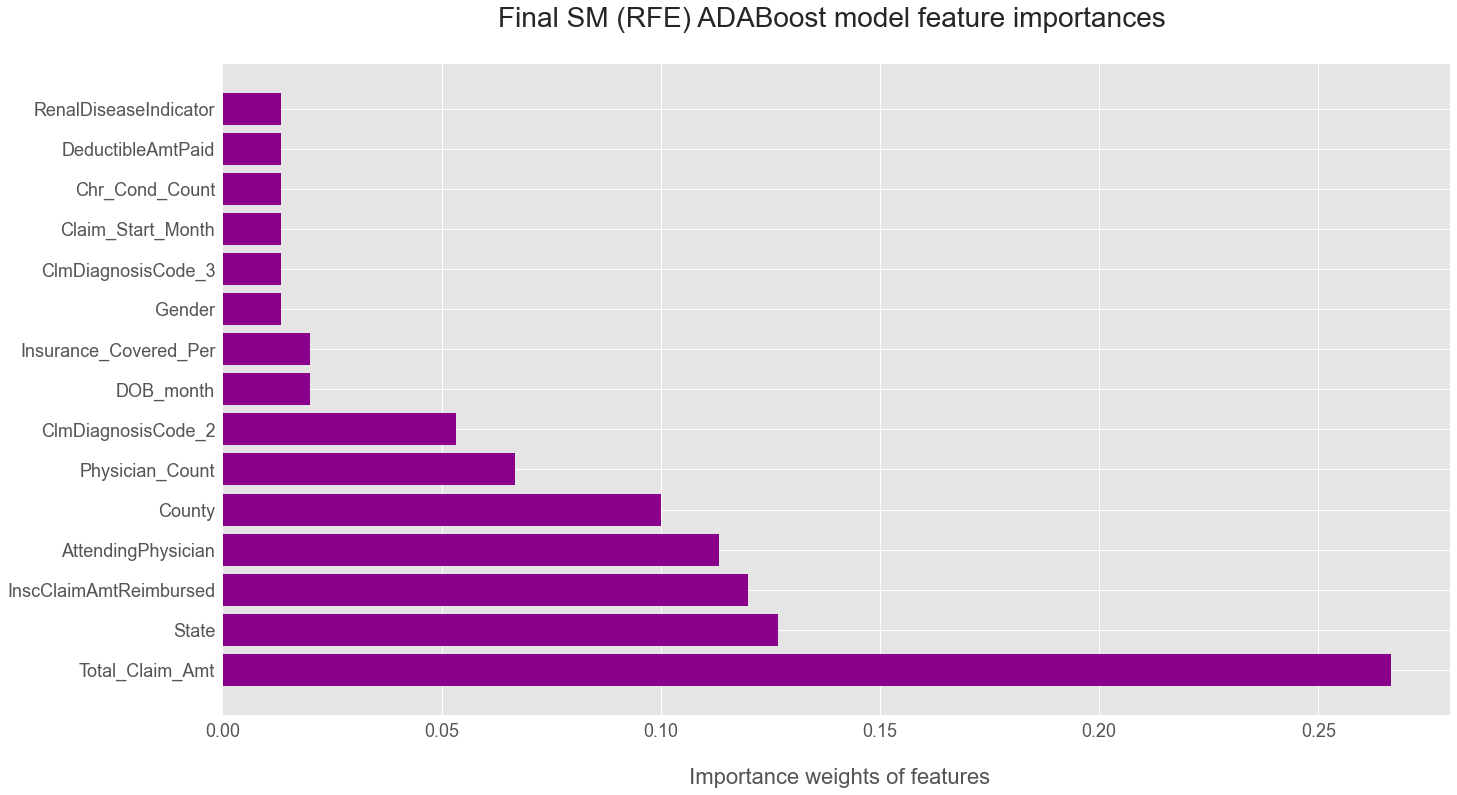

In [25]:
# Creating feature importance table:

feature_imp_df1 = pd.DataFrame(zip(selected_feat1,\
                               abs(ada_sm.feature_importances_)),
                               columns=["Feature Name", "Weight"])

feature_imp_df1 = feature_imp_df1.sort_values("Weight", ascending=False)\
                  .reset_index(drop=True)

# Looking at top 25 features

top_features1 = feature_imp_df1.head(20)

# Visualizing the results

plt.figure(figsize = (22,12))
plt.barh(top_features1["Feature Name"].head(15), top_features1["Weight"].head(15), color ="darkmagenta")
plt.xlabel("\n Importance weights of features", fontsize = 22)
plt.title("Final SM (RFE) ADABoost model feature importances \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [26]:
# Model using RFE 20 features

ada_bsm = AdaBoostClassifier(random_state=42, n_estimators=150,learning_rate=1.78)

selected_feat2 = trainX_BSM.columns[rfe2.support_]

model_results(trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM, ada_bsm, show=True)

The Model Results for  AdaBoostClassifier(learning_rate=1.78, n_estimators=150, random_state=42)
************************************************************
Train Accuracy is equal to 0.690
Test Accuracy is equal to 0.690
The Precision score is 0.717
The Average Precision score is 0.636
The Recall score is 0.629
The F1 score is 0.670
The AUC/ROC score is 0.690
True-Positive: 65155.000
True-Negative: 77898.000
False-Positive: 25727.000
False-Negative: 38470.000
Correctly Classified: 143053.000
Incorrectly Classified: 64197.000


[0.6897535051077381,
 0.6902436670687575,
 0.7169186417552431,
 0.6287575392038601]

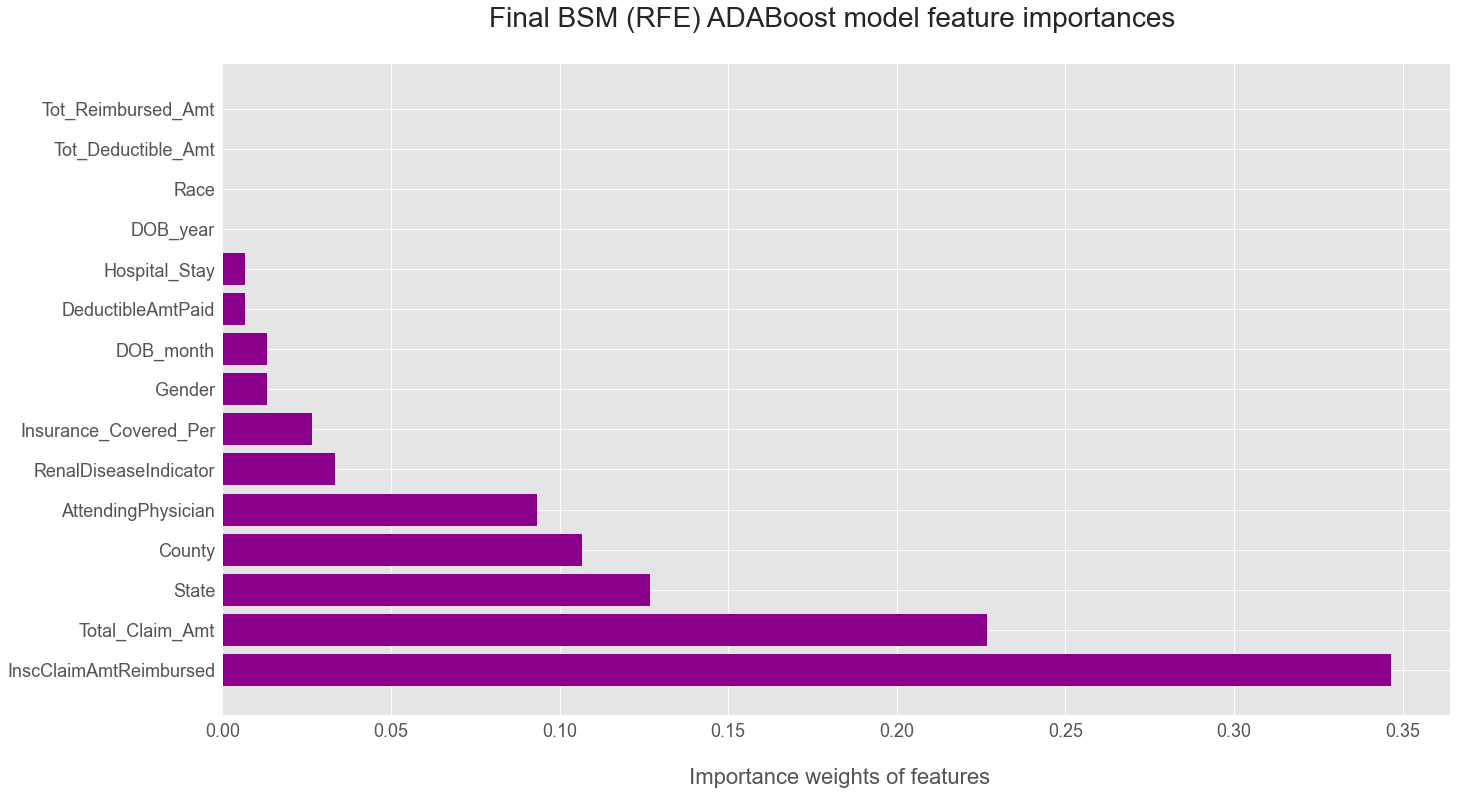

In [27]:
# Creating feature importance table:

feature_imp_df2 = pd.DataFrame(zip(selected_feat2,\
                               abs(ada_bsm.feature_importances_)),
                               columns=["Feature Name", "Weight"])

feature_imp_df2 = feature_imp_df2.sort_values("Weight", ascending=False)\
                  .reset_index(drop=True)

# Looking at top 25 features

top_features2 = feature_imp_df2.head(20)

# Visualizing the results

plt.figure(figsize = (22,12))
plt.barh(top_features2["Feature Name"].head(15), top_features2["Weight"].head(15), color ="darkmagenta")
plt.xlabel("\n Importance weights of features", fontsize = 22)
plt.title("Final BSM (RFE) ADABoost model feature importances \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### # Full set of evaluation metrics for both models:

- Confusion Matrix

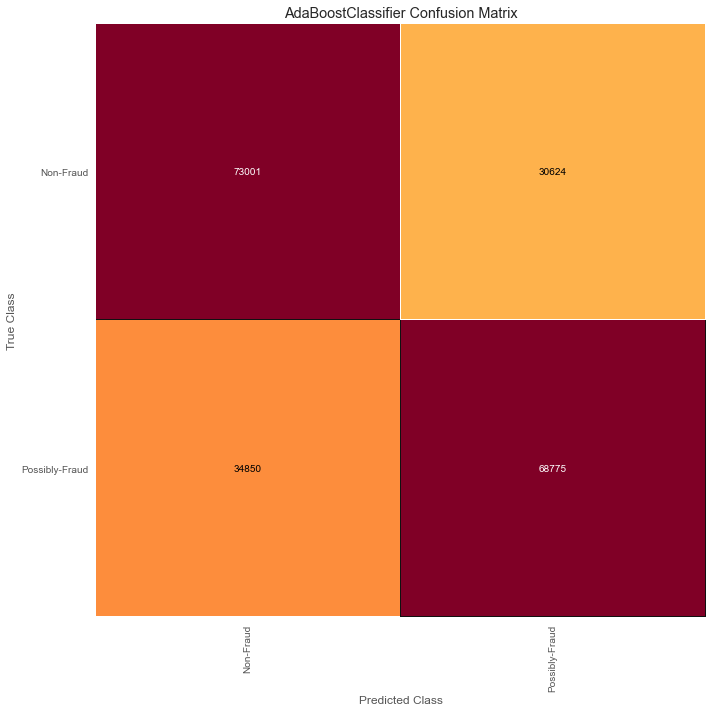

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    ada_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

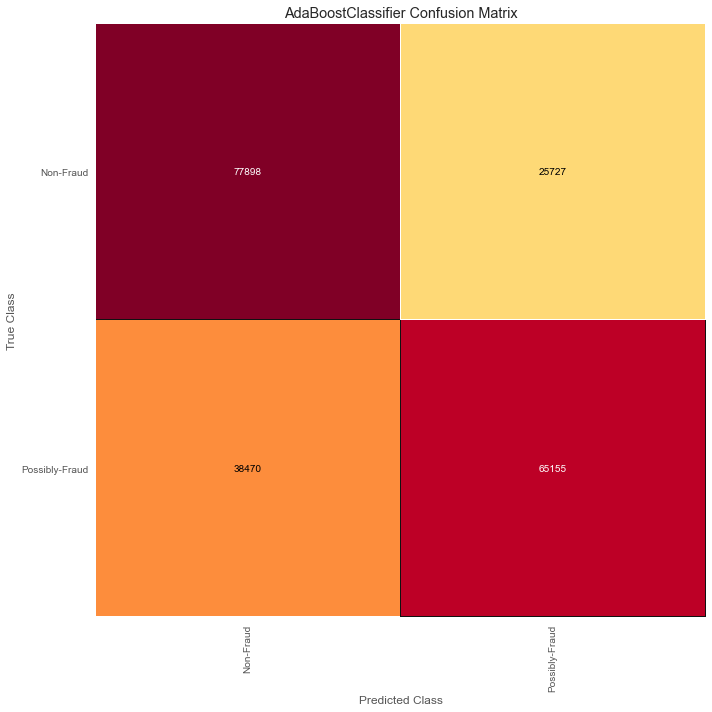

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    ada_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

- AUC/ROC curve

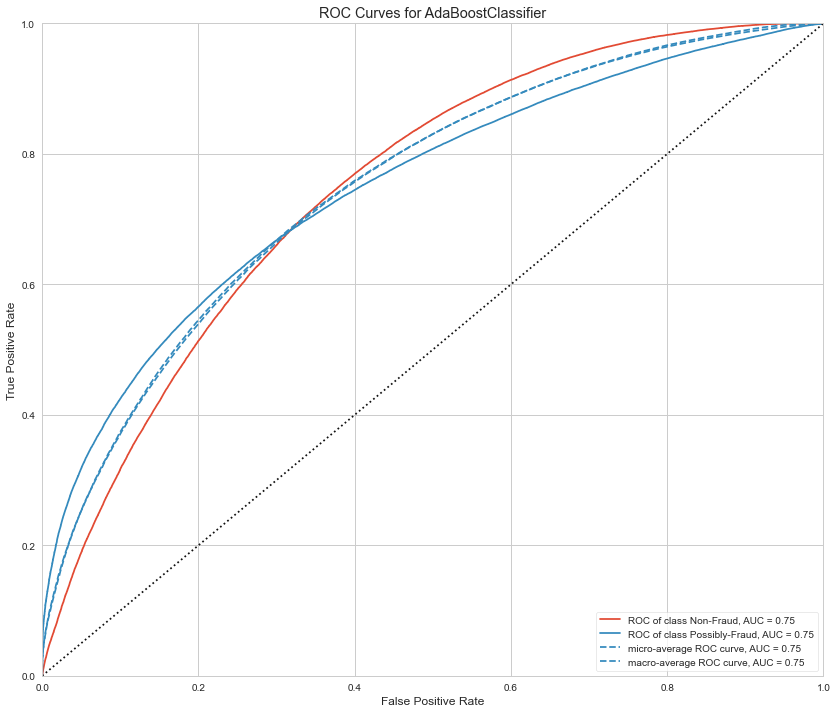

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [30]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(ada_sm, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_SM[selected_feat1], trainY_SM)        # Fit the training data to the visualizer
visualizer.score(testX_SM[selected_feat1], testY_SM)        # Evaluate the model on the test data

visualizer.show()

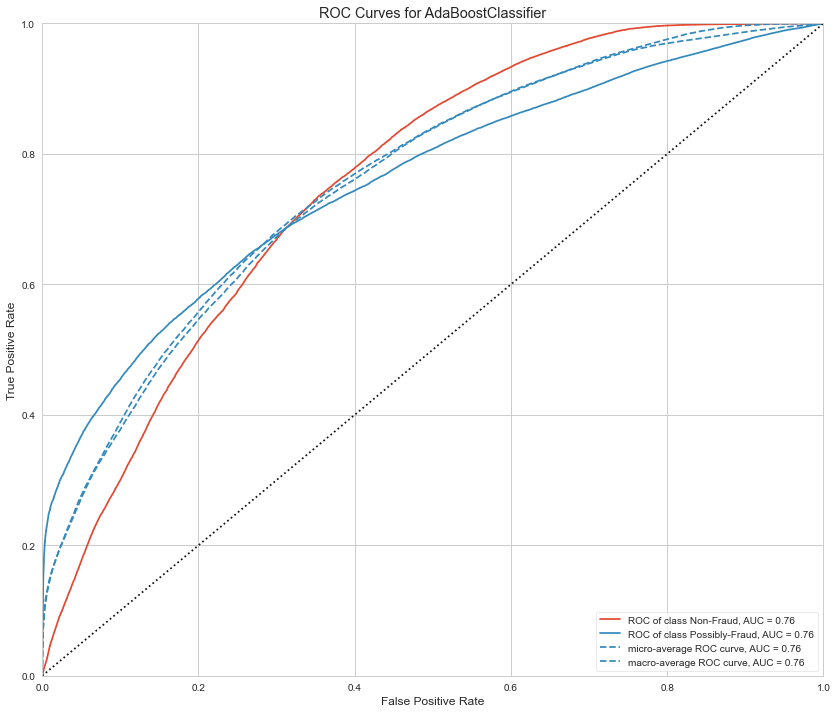

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(ada_bsm, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_BSM[selected_feat2], trainY_BSM)        # Fit the training data to the visualizer
visualizer.score(testX_BSM[selected_feat2], testY_BSM)        # Evaluate the model on the test data

visualizer.show()

- Classification report

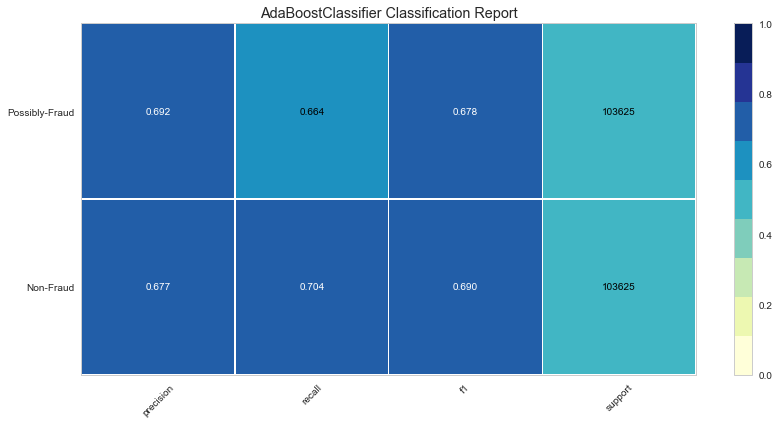

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [32]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    ada_sm,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

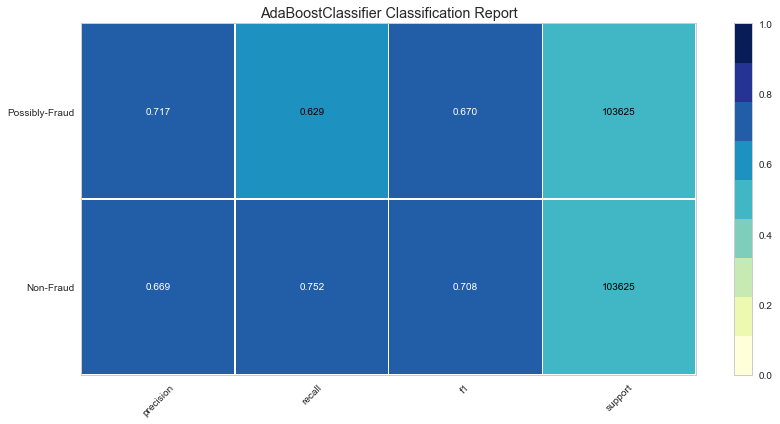

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [33]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    ada_bsm,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

- Precision-recall curve

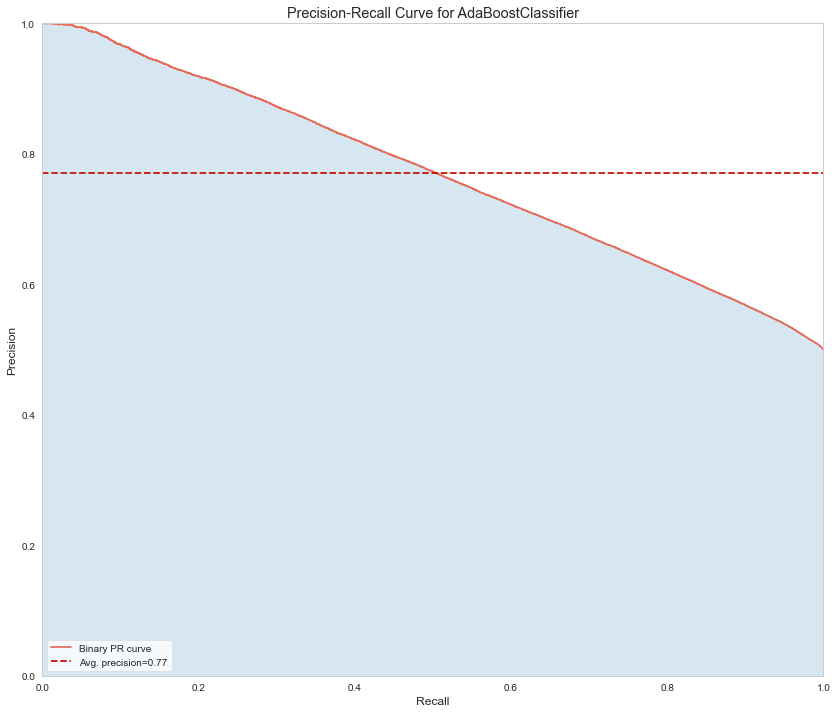

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [34]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(ada_sm, trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM)
viz.show()

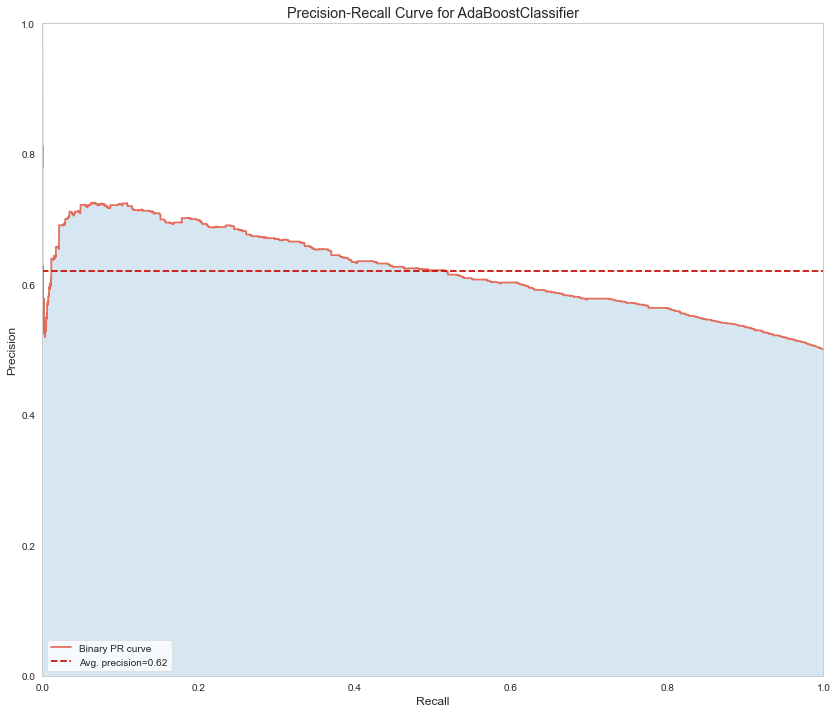

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [35]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(ada_bsm, trainX_BSM[selected_feat1], trainY_BSM, testX_BSM[selected_feat1], testY_BSM)
viz.show()

- Prediction error

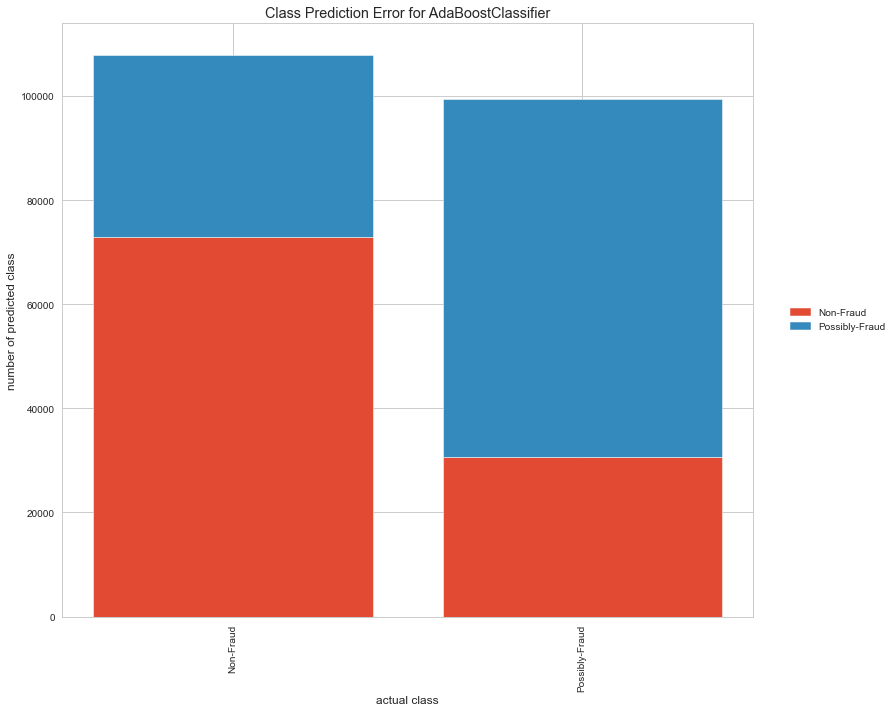

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [36]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    ada_sm,
    trainX_SM[selected_feat1], trainY_SM.values.ravel(),
    testX_SM[selected_feat1], testY_SM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

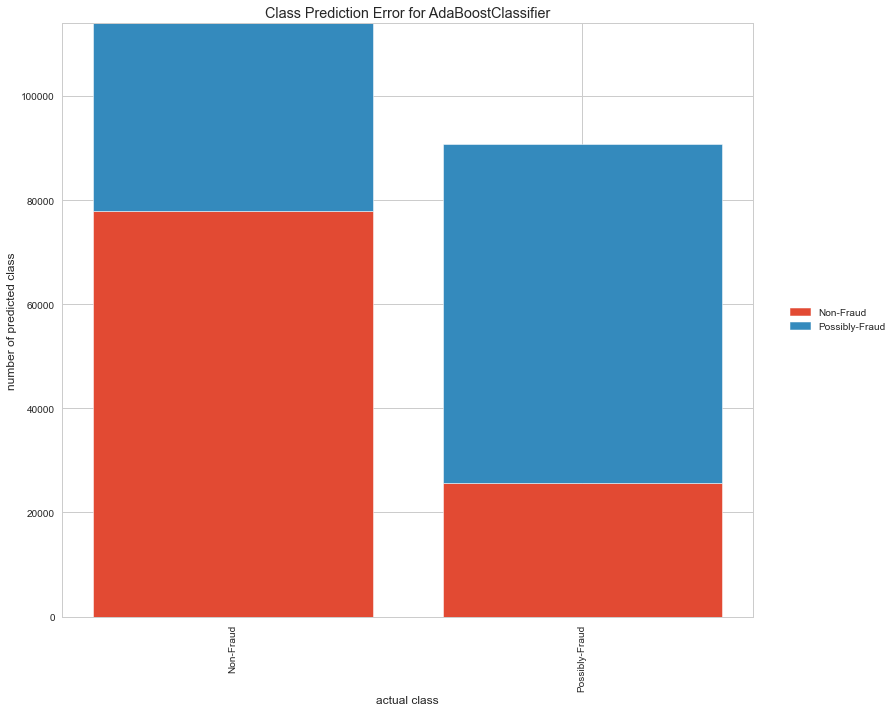

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [37]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    ada_bsm,
    trainX_BSM[selected_feat2], trainY_BSM.values.ravel(),
    testX_BSM[selected_feat2], testY_BSM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

### # Threshold selection for both:

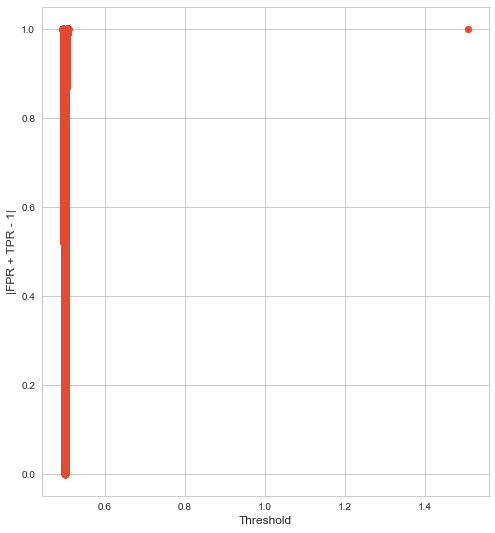

In [38]:
# Visualizing the threshold

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
fpr1, tpr1, thresholds1 = roc_curve(trainY_SM,ada_sm.predict_proba(trainX_SM[selected_feat1])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds1,np.abs(fpr1+tpr1-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [39]:
thresholds1[np.argmin(np.abs(fpr1+tpr1-1))]

0.4999493956490716

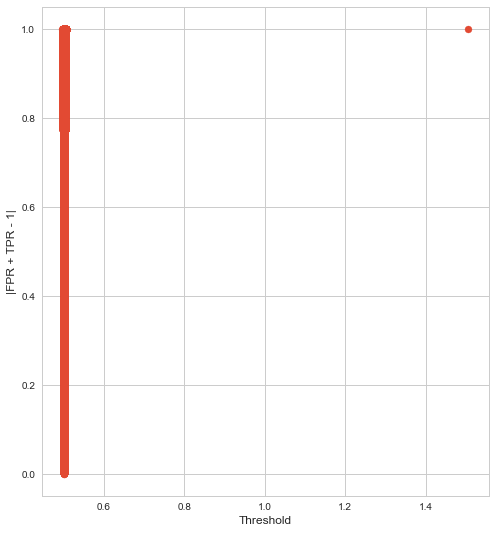

In [40]:
# Visualizing the threshold

sns.set_style("whitegrid")
fpr2, tpr2, thresholds2 = roc_curve(trainY_BSM,ada_bsm.predict_proba(trainX_BSM[selected_feat2])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds2,np.abs(fpr2+tpr2-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [41]:
thresholds2[np.argmin(np.abs(fpr2+tpr2-1))]

0.4999064607384617

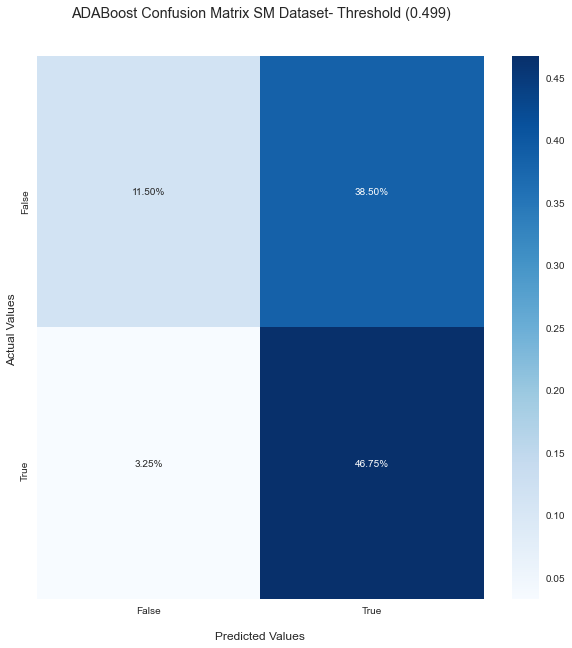

In [42]:
# Looking at confusion matrix (thres=0.499)

cm1 = get_confusion_matrix(ada_sm, testX_SM[selected_feat1], testY_SM, thres=0.499)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('ADABoost Confusion Matrix SM Dataset- Threshold (0.499)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

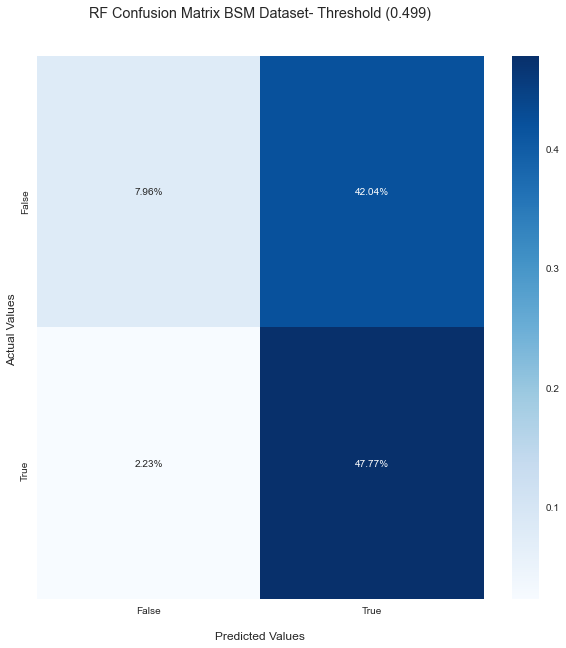

In [43]:
# Looking at confusion matrix (thres=0.499)

cm2 = get_confusion_matrix(ada_bsm, testX_BSM[selected_feat2], testY_BSM, thres=0.499)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('RF Confusion Matrix BSM Dataset- Threshold (0.499)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()